# Data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

%matplotlib inline

In [2]:
data = pd.read_excel('../data/portfolio.xlsx')
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Latitude,Longitude,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
0,2015-01-02,1833069,Normal,SDVFAST,Sur,Granada,18198,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1959-09-02,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,2 - CASADO,2000,13,EED,2019-06-30,BAJA,37.154212,-3.571386,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,NaN,NaN
1,2015-01-02,1833074,Normal,SDVFAST,Noreste,Barcelona,08173,M - MUJER,ES - ESPAÑOLA,SPAIN,1971-04-15,4 - FAMILIARES/PADRES,06 PARADO,4 - SEPARADO/DIVORCIADO,600,12,EED,2015-01-05,OP,41.476380,2.066510,P-Apartamento (domicilio particular),Financiado,Entre 000-050,49+(36*10),49,409,10,12.0,NaN
2,2015-01-02,1833079,Normal,SDVFAST,Centro-Noroeste,Madrid Noroeste,28011,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1968-02-10,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,4 - SEPARADO/DIVORCIADO,2500,14,HBD,2015-01-05,OP,40.409786,-3.730198,P-Apartamento (domicilio particular),Financiado,Entre 050-100,99+(36*10),99,459,10,NaN,NaN
3,2015-01-02,1833080,Normal,SDVFAST,Sur,Sevilla,41500,M - MUJER,ES - ESPAÑOLA,SPAIN,1968-12-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1800,12,EED,2015-01-13,OP,37.283033,-5.878133,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,2.0,NaN
4,2015-01-02,1833081,Normal,SDVFAST,Noreste,Barcelona,08014,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1977-02-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1500,12,EEE,2015-01-07,OP,41.379252,2.137135,N-Tienda- negocio al publico,Financiado,Entre 050-100,99+(36*10),99,459,10,NaN,NaN


In [3]:
data.shape

(521534, 30)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521534 entries, 0 to 521533
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Installation Date       521534 non-null  datetime64[ns]
 1   Installation Number     521534 non-null  int64         
 2   Client Type             521533 non-null  object        
 3   Panel                   521534 non-null  object        
 4   Territorial             521534 non-null  object        
 5   Provincia               521534 non-null  object        
 6   Zip                     521534 non-null  object        
 7   Gender                  521534 non-null  object        
 8   Nationality             521534 non-null  object        
 9   Country Of Birth        521534 non-null  object        
 10  Born Date               519524 non-null  datetime64[ns]
 11  Housing Type            521534 non-null  object        
 12  Labor Situation         521534

In [5]:
data.isnull().sum()

Installation Date              0
Installation Number            0
Client Type                    1
Panel                          0
Territorial                    0
Provincia                      0
Zip                            0
Gender                         0
Nationality                    0
Country Of Birth               0
Born Date                   2010
Housing Type                   0
Labor Situation                0
Marital Status                 0
Income Amount                  0
Number Pay                     0
Price List                     1
Monitoring Status Date         0
Monitoring Status              0
Latitude                       0
Longitude                      0
Tipo Instalacion               0
Financiado                     0
Rango Kit                      0
Resumen Precio                 0
Kit Contado                    0
Kit Total                      0
Kit Mensualidad                0
Quejas                    429454
MT                        466432
dtype: int

In [6]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Número de Filas:", df.shape[0])
    print("\nNúmero de Columnas:", df.shape[1])
    print("\nColumnas:\n")
    print(data.columns.tolist())
    print("\nValores nulos:", df.isnull().sum().values.sum())
    print("\nValores únicos:\n")
    print(df.nunique())

In [7]:
dataoveriew(data, 'Overiew of the dataset')

Overiew of the dataset:

Número de Filas: 521534

Número de Columnas: 30

Columnas:

['Installation Date', 'Installation Number', 'Client Type', 'Panel', 'Territorial', 'Provincia', 'Zip', 'Gender', 'Nationality', 'Country Of Birth', 'Born Date', 'Housing Type', 'Labor Situation', 'Marital Status', 'Income Amount', 'Number Pay', 'Price List', 'Monitoring Status Date', 'Monitoring Status', 'Latitude', 'Longitude', 'Tipo Instalacion', 'Financiado', 'Rango Kit', 'Resumen Precio', 'Kit Contado', 'Kit Total', 'Kit Mensualidad', 'Quejas', 'MT']

Valores nulos: 897898

Valores únicos:

Installation Date           2203
Installation Number       521270
Client Type                    2
Panel                          3
Territorial                    7
Provincia                     54
Zip                         9261
Gender                         2
Nationality                   11
Country Of Birth             200
Born Date                  28143
Housing Type                   6
Labor Situation   

In [8]:
data['Quejas'] = data['Quejas'].replace(np.nan, 0).astype('int')
data['MT'] = data['MT'].replace(np.nan, 0).astype('int')
data['Installation Number'] = data['Installation Number'].astype('str')
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Latitude,Longitude,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
0,2015-01-02,1833069,Normal,SDVFAST,Sur,Granada,18198,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1959-09-02,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,2 - CASADO,2000,13,EED,2019-06-30,BAJA,37.154212,-3.571386,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,0,0
1,2015-01-02,1833074,Normal,SDVFAST,Noreste,Barcelona,08173,M - MUJER,ES - ESPAÑOLA,SPAIN,1971-04-15,4 - FAMILIARES/PADRES,06 PARADO,4 - SEPARADO/DIVORCIADO,600,12,EED,2015-01-05,OP,41.476380,2.066510,P-Apartamento (domicilio particular),Financiado,Entre 000-050,49+(36*10),49,409,10,12,0
2,2015-01-02,1833079,Normal,SDVFAST,Centro-Noroeste,Madrid Noroeste,28011,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1968-02-10,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,4 - SEPARADO/DIVORCIADO,2500,14,HBD,2015-01-05,OP,40.409786,-3.730198,P-Apartamento (domicilio particular),Financiado,Entre 050-100,99+(36*10),99,459,10,0,0
3,2015-01-02,1833080,Normal,SDVFAST,Sur,Sevilla,41500,M - MUJER,ES - ESPAÑOLA,SPAIN,1968-12-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1800,12,EED,2015-01-13,OP,37.283033,-5.878133,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,2,0
4,2015-01-02,1833081,Normal,SDVFAST,Noreste,Barcelona,08014,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1977-02-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1500,12,EEE,2015-01-07,OP,41.379252,2.137135,N-Tienda- negocio al publico,Financiado,Entre 050-100,99+(36*10),99,459,10,0,0


In [9]:
data.describe()

,Income Amount,Number Pay,Latitude,Longitude,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
count,5.215340e+05,521534.000000,521534.000000,521534.000000,521534.000000,521534.000000,521534.000000,521534.000000,521534.000000
mean,2.009001e+04,13.024368,39.151398,-3.147138,107.682701,482.305798,9.934606,0.316591,0.821509
std,4.039698e+06,1.080585,3.594348,4.690792,99.889929,111.869540,1.203514,0.942440,3.349464
min,0.000000e+00,12.000000,27.698181,-18.103480,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.200000e+03,12.000000,37.868581,-4.871156,49.000000,409.000000,10.000000,0.000000,0.000000
50%,1.500000e+03,12.000000,40.293548,-3.517289,99.000000,459.000000,10.000000,0.000000,0.000000
75%,2.000000e+03,14.000000,41.422507,0.123036,199.000000,559.000000,10.000000,0.000000,0.000000
max,1.600000e+09,16.000000,43.773401,4.302248,1097.000000,4939.000000,99.000000,46.000000,52.000000


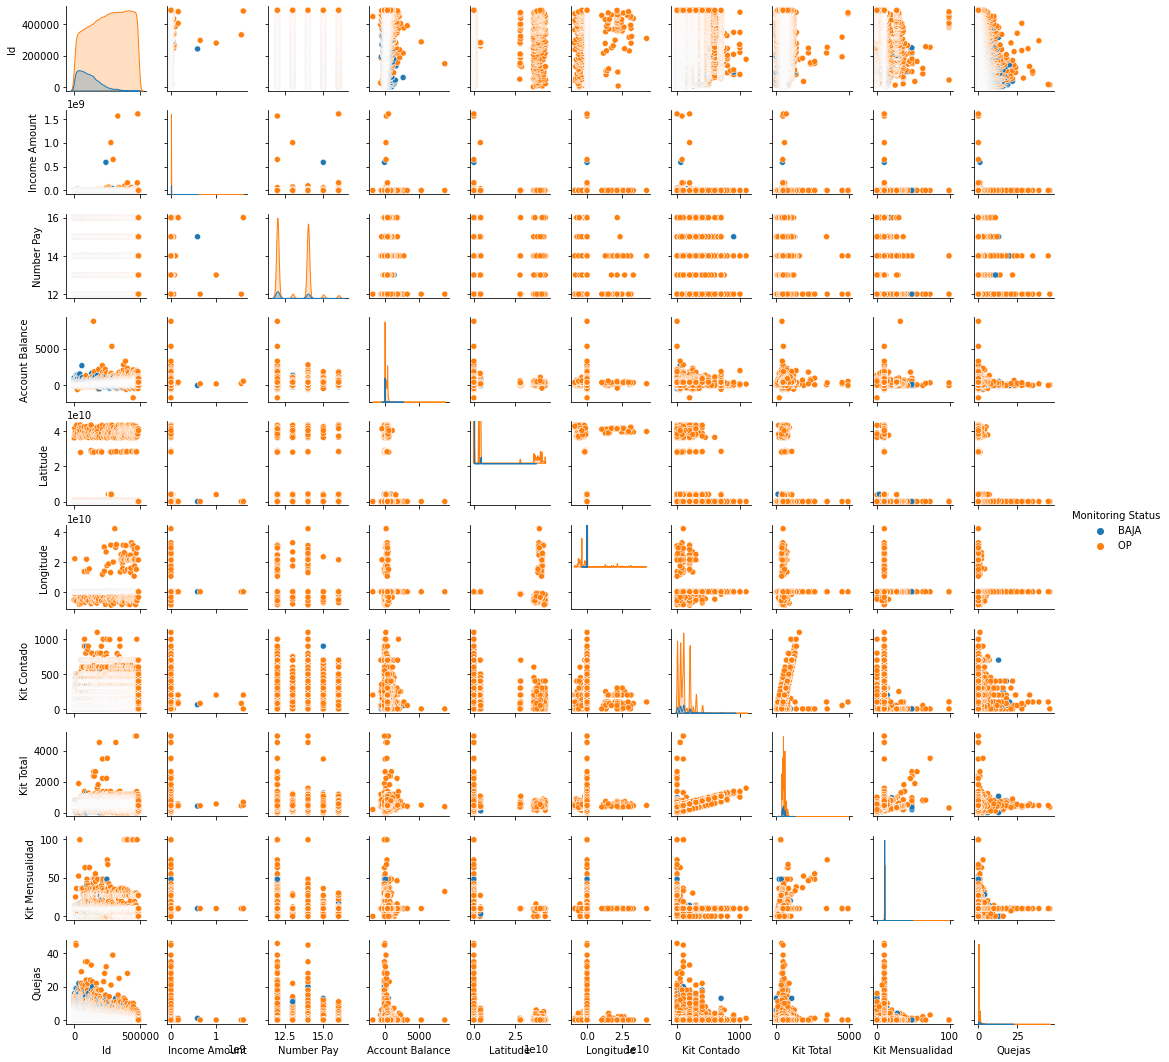

In [10]:
# Don´t do this!!!!

# sns.pairplot(data = data, diag_kind = 'kde', hue = 'Monitoring Status', height = 1.5);

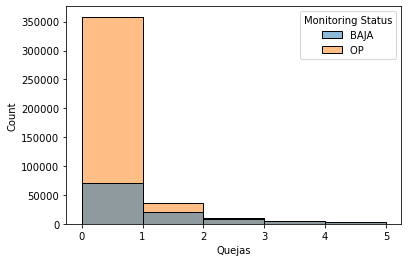

In [10]:
sns.histplot(data = data, x="Quejas", hue = 'Monitoring Status', binwidth=1,  binrange = (0,5));

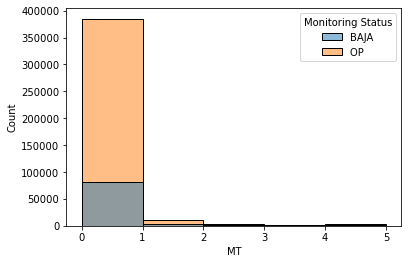

In [10]:
sns.histplot(data = data, x="MT", hue = 'Monitoring Status', binwidth=1,  binrange = (0,5));

In [11]:
data.groupby("Monitoring Status")["Monitoring Status"].count()

Monitoring Status
BAJA    107748
OP      413786
Name: Monitoring Status, dtype: int64

### Totales y % de Baja en variables categóricas

'Client Type', 'Panel', 'Territorial', 'Provincia', 'Zip', 'Gender', 'Nationality', 'Country Of Birth', 'Housing Type', 'Labor Situation', 'Marital Status', 'Number Pay'

In [12]:
tab1 = pd.crosstab(data["Nationality"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Nationality"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Nationality,,,,,
AF - AFRICA MENOS MAGREB,309,250,559,0.552773,0.447227
AJ - AUSTRALIA Y JAPON,15,74,89,0.168539,0.831461
AS - ASIA MENOS JAPON,638,1654,2292,0.278360,0.721640
ES - ESPAÃOLA,1259,9071,10330,0.121878,0.878122
ES - ESPAÑOLA,93718,375820,469538,0.199596,0.800404
IB - IBEROAMERICA,2421,2629,5050,0.479406,0.520594
MA - MAGREB,448,330,778,0.575835,0.424165
OT - OTROS,1473,2157,3630,0.405785,0.594215
RE - RESTO DE EUROPA,689,1897,2586,0.266435,0.733565


In [13]:
tab1 = pd.crosstab(data["Client Type"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Client Type"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Client Type,,,,,
Gran_Cuenta,5548,17490,23038,0.240820,0.759180
Normal,102200,396295,498495,0.205017,0.794983
All,107748,413785,521533,0.206599,0.793401


In [14]:
tab1 = pd.crosstab(data["Panel"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Panel"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Panel,,,,,
SDVERW,3,0,3,1.000000,0.000000
SDVFAST,87253,377217,464470,0.187855,0.812145
SDVFSW,20492,36569,57061,0.359124,0.640876
All,107748,413786,521534,0.206598,0.793402


In [15]:
tab1 = pd.crosstab(data["Territorial"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Territorial"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Territorial,,,,,
Centro-Noroeste,18599,69885,88484,0.210196,0.789804
Centro-Norte,15838,60443,76281,0.207627,0.792373
Centro-Sur,16550,55363,71913,0.230139,0.769861
ErrorProvincia,6,9,15,0.400000,0.600000
Este,19289,73076,92365,0.208835,0.791165
Noreste,17021,87077,104098,0.163509,0.836491
Sur,20445,67933,88378,0.231336,0.768664
All,107748,413786,521534,0.206598,0.793402


In [16]:
tab1 = pd.crosstab(data["Provincia"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Provincia"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Provincia,,,,,
Alava,398,1136,1534,0.259452,0.740548
Albacete,910,2456,3366,0.270351,0.729649
Alicante,4763,18860,23623,0.201626,0.798374
Almeria,1792,5986,7778,0.230393,0.769607
Asturias,1842,6589,8431,0.218479,0.781521
Avila,234,1056,1290,0.181395,0.818605
Badajoz,1963,5160,7123,0.275586,0.724414
Baleares,3514,19314,22828,0.153934,0.846066
Barcelona,12184,64017,76201,0.159893,0.840107


In [17]:
tab1 = pd.crosstab(data["Gender"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Gender"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Gender,,,,,
H - HOMBRE,82852,321311,404163,0.204996,0.795004
M - MUJER,24896,92475,117371,0.212114,0.787886
All,107748,413786,521534,0.206598,0.793402


In [18]:
tab1 = pd.crosstab(data["Housing Type"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Housing Type"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Housing Type,,,,,
1 - PROPIEDAD SIN HIPOTECA,71666,322490,394156,0.181821,0.818179
2 - PROPIEDAD HIPOTECADA,18182,64540,82722,0.219796,0.780204
3 - ALQUILER,14968,20719,35687,0.419424,0.580576
4 - FAMILIARES/PADRES,1705,2659,4364,0.390697,0.609303
5 - EMPRESA,1226,3377,4603,0.266348,0.733652
6 - OTROS,1,1,2,0.500000,0.500000
All,107748,413786,521534,0.206598,0.793402


In [19]:
tab1 = pd.crosstab(data["Labor Situation"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Labor Situation"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Labor Situation,,,,,
01 ASALARIADO FIJO,35159,159665,194824,0.180465,0.819535
02 ASALARIADO TEMPORAL,1033,1678,2711,0.381040,0.618960
03 FUNCIONARIO,2956,18004,20960,0.141031,0.858969
04 AUTONOMO,53283,136191,189474,0.281215,0.718785
06 PARADO,2032,4048,6080,0.334211,0.665789
07 PENSIONISTA (JUBILACION),11538,88339,99877,0.115522,0.884478
08 PENSIONISTA (VIUDEDAD),908,3369,4277,0.212298,0.787702
09 PENSIONISTA (LARGA ENFERMEDAD),839,2492,3331,0.251876,0.748124
All,107748,413786,521534,0.206598,0.793402


In [20]:
tab1 = pd.crosstab(data["Marital Status"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Marital Status"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Marital Status,,,,,
1 - SOLTERO,34125,83513,117638,0.290085,0.709915
2 - CASADO,62927,288103,351030,0.179264,0.820736
3 - VIUDO,4380,24878,29258,0.149703,0.850297
4 - SEPARADO/DIVORCIADO,5403,15030,20433,0.264425,0.735575
5 ? PAREJA DE HECHO,903,2225,3128,0.288683,0.711317
5 â PAREJA DE HECHO,10,37,47,0.212766,0.787234
All,107748,413786,521534,0.206598,0.793402


In [21]:
tab1 = pd.crosstab(data["Number Pay"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Number Pay"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Number Pay,,,,,
12,62772,198981,261753,0.239814,0.760186
13,2428,10958,13386,0.181384,0.818616
14,39457,187339,226796,0.173976,0.826024
15,1903,9228,11131,0.170964,0.829036
16,1188,7280,8468,0.140293,0.859707
All,107748,413786,521534,0.206598,0.793402


In [22]:
tab1 = pd.crosstab(data["Financiado"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Financiado"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Financiado,,,,,
Contado,496,2637,3133,0.158315,0.841685
Financiado,105685,406593,512278,0.206304,0.793696
Financiado GGCC,1567,4556,6123,0.255920,0.744080
All,107748,413786,521534,0.206598,0.793402


In [23]:
tab1 = pd.crosstab(data["Rango Kit"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Rango Kit"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Rango Kit,,,,,
A 0,23979,84998,108977,0.220037,0.779963
Entre 000-050,25534,80026,105560,0.241891,0.758109
Entre 050-100,29677,122151,151828,0.195465,0.804535
Entre 100-200,20358,85663,106021,0.192019,0.807981
Entre 200-300,6454,28124,34578,0.186650,0.813350
Mas de 300,1746,12824,14570,0.119835,0.880165
All,107748,413786,521534,0.206598,0.793402


In [24]:
tab1 = pd.crosstab(data["Tipo Instalacion"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Tipo Instalacion"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Tipo Instalacion,,,,,
C-Comunidad de Propietarios,24,43,67,0.358209,0.641791
N- Oficinas en Altura,60,352,412,0.145631,0.854369
N-Autocaravana,0,1,1,0.000000,1.000000
"N-Bar, Pub, Restaurante",9366,9143,18509,0.506024,0.493976
N-Casetas de Obra,18,37,55,0.327273,0.672727
"N-Nave, taller (industrial)",7379,17827,25206,0.292748,0.707252
"N-Oficinas, empresas",2924,8081,11005,0.265697,0.734303
N-Tienda- negocio al publico,21196,32376,53572,0.395654,0.604346
P-Apartamento (domicilio particular),31410,168249,199659,0.157318,0.842682


### Correlación

In [25]:
data['Monitoring Status'] = data['Monitoring Status'].astype('str').str.strip()
data['Monitoring Status'] = data['Monitoring Status'].replace({'OP': 0, 'BAJA': 1}).astype(int)
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Latitude,Longitude,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
0,2015-01-02,1833069,Normal,SDVFAST,Sur,Granada,18198,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1959-09-02,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,2 - CASADO,2000,13,EED,2019-06-30,1,37.154212,-3.571386,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,0,0
1,2015-01-02,1833074,Normal,SDVFAST,Noreste,Barcelona,08173,M - MUJER,ES - ESPAÑOLA,SPAIN,1971-04-15,4 - FAMILIARES/PADRES,06 PARADO,4 - SEPARADO/DIVORCIADO,600,12,EED,2015-01-05,0,41.476380,2.066510,P-Apartamento (domicilio particular),Financiado,Entre 000-050,49+(36*10),49,409,10,12,0
2,2015-01-02,1833079,Normal,SDVFAST,Centro-Noroeste,Madrid Noroeste,28011,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1968-02-10,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,4 - SEPARADO/DIVORCIADO,2500,14,HBD,2015-01-05,0,40.409786,-3.730198,P-Apartamento (domicilio particular),Financiado,Entre 050-100,99+(36*10),99,459,10,0,0
3,2015-01-02,1833080,Normal,SDVFAST,Sur,Sevilla,41500,M - MUJER,ES - ESPAÑOLA,SPAIN,1968-12-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1800,12,EED,2015-01-13,0,37.283033,-5.878133,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,2,0
4,2015-01-02,1833081,Normal,SDVFAST,Noreste,Barcelona,08014,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1977-02-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1500,12,EEE,2015-01-07,0,41.379252,2.137135,N-Tienda- negocio al publico,Financiado,Entre 050-100,99+(36*10),99,459,10,0,0


In [26]:
corr = data.corr()
corr

,Income Amount,Number Pay,Monitoring Status,Latitude,Longitude,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
Income Amount,1.000000,0.006450,-0.001358,0.001983,0.003375,-0.000539,0.000903,0.000228,-0.000967,-0.000932
Number Pay,0.006450,1.000000,-0.081391,0.150215,0.101103,0.039868,0.008572,-0.000444,-0.018439,-0.035689
Monitoring Status,-0.001358,-0.081391,1.000000,-0.013390,-0.037978,-0.049776,-0.012797,-0.000075,0.196511,0.238188
Latitude,0.001983,0.150215,-0.013390,1.000000,0.721254,0.049218,0.045260,-0.004622,0.022928,-0.013029
Longitude,0.003375,0.101103,-0.037978,0.721254,1.000000,0.050447,0.032103,-0.006389,0.003834,-0.010643
Kit Contado,-0.000539,0.039868,-0.049776,0.049218,0.050447,1.000000,0.868200,-0.062318,-0.017502,-0.014400
Kit Total,0.000903,0.008572,-0.012797,0.045260,0.032103,0.868200,1.000000,0.160115,-0.028097,-0.007656
Kit Mensualidad,0.000228,-0.000444,-0.000075,-0.004622,-0.006389,-0.062318,0.160115,1.000000,-0.004057,-0.000592
Quejas,-0.000967,-0.018439,0.196511,0.022928,0.003834,-0.017502,-0.028097,-0.004057,1.000000,0.053928
MT,-0.000932,-0.035689,0.238188,-0.013029,-0.010643,-0.014400,-0.007656,-0.000592,0.053928,1.000000


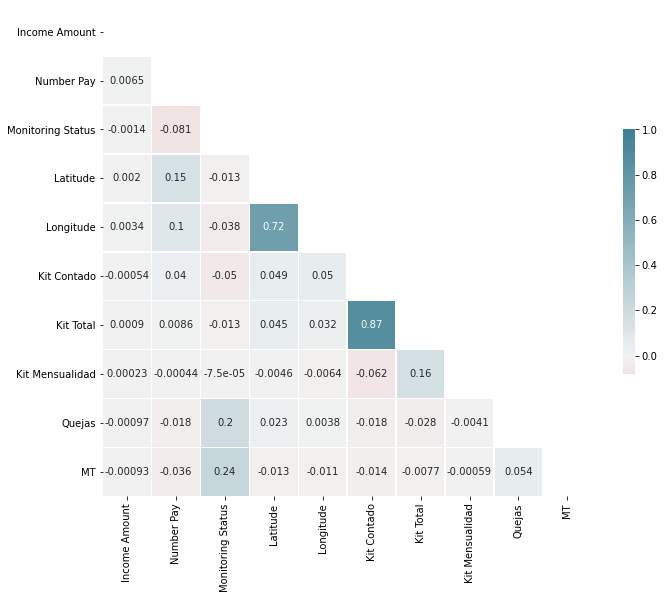

In [27]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [28]:
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Latitude,Longitude,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
0,2015-01-02,1833069,Normal,SDVFAST,Sur,Granada,18198,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1959-09-02,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,2 - CASADO,2000,13,EED,2019-06-30,1,37.154212,-3.571386,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,0,0
1,2015-01-02,1833074,Normal,SDVFAST,Noreste,Barcelona,08173,M - MUJER,ES - ESPAÑOLA,SPAIN,1971-04-15,4 - FAMILIARES/PADRES,06 PARADO,4 - SEPARADO/DIVORCIADO,600,12,EED,2015-01-05,0,41.476380,2.066510,P-Apartamento (domicilio particular),Financiado,Entre 000-050,49+(36*10),49,409,10,12,0
2,2015-01-02,1833079,Normal,SDVFAST,Centro-Noroeste,Madrid Noroeste,28011,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1968-02-10,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,4 - SEPARADO/DIVORCIADO,2500,14,HBD,2015-01-05,0,40.409786,-3.730198,P-Apartamento (domicilio particular),Financiado,Entre 050-100,99+(36*10),99,459,10,0,0
3,2015-01-02,1833080,Normal,SDVFAST,Sur,Sevilla,41500,M - MUJER,ES - ESPAÑOLA,SPAIN,1968-12-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1800,12,EED,2015-01-13,0,37.283033,-5.878133,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,2,0
4,2015-01-02,1833081,Normal,SDVFAST,Noreste,Barcelona,08014,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1977-02-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1500,12,EEE,2015-01-07,0,41.379252,2.137135,N-Tienda- negocio al publico,Financiado,Entre 050-100,99+(36*10),99,459,10,0,0


### Filtrado de una comunidad para MVP

In [29]:
provincias = ['Alicante', 'Valencia', 'Castellon']

data_filtered = data[data['Provincia'].isin(provincias)]
data_filtered.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Latitude,Longitude,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
15,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,03300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,38.060900,-0.950240,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0
77,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,39.588239,-0.502772,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0
90,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,03150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,38.154230,-0.749640,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0
97,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,03294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,38.212568,-0.682989,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,10
122,2015-01-07,1833687,Normal,SDVFAST,Este,Alicante,03010,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1986-06-18,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,2000,12,TSE,2018-03-31,1,38.366849,-0.487184,N-Tienda- negocio al publico,Financiado,A 0,0+(36*10),0,360,10,0,1


In [30]:
data_filtered.to_excel('../data/portfolio_com_valencia.xlsx')

### Filtrado de clientes de Madrid

In [31]:
provincias2 = ['Madrid Noroeste', 'Madrid Norte']

data_madrid = data[data['Provincia'].isin(provincias2)]
data_madrid.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Latitude,Longitude,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
2,2015-01-02,1833079,Normal,SDVFAST,Centro-Noroeste,Madrid Noroeste,28011,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1968-02-10,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,4 - SEPARADO/DIVORCIADO,2500,14,HBD,2015-01-05,0,40.409786,-3.730198,P-Apartamento (domicilio particular),Financiado,Entre 050-100,99+(36*10),99,459,10,0,0
7,2015-01-02,1833104,Normal,SDVFAST,Centro-Norte,Madrid Norte,28500,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1974-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,0,12,HBD,2015-01-07,0,40.290366,-3.443498,P-Chalet Pareado,Financiado,Entre 100-200,199+(36*10),199,559,10,1,0
17,2015-01-02,1833191,Normal,SDVFAST,Centro-Norte,Madrid Norte,28001,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1977-09-20,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBD,2015-01-05,0,40.424843,-3.678043,P-Apartamento (domicilio particular),Financiado,Entre 100-200,199+(36*10),199,559,10,0,0
18,2015-01-02,1833195,Normal,SDVFAST,Centro-Norte,Madrid Norte,28510,M - MUJER,ES - ESPAÑOLA,SPAIN,1954-05-22,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,0,12,HBD,2015-01-05,0,40.339241,-3.381298,P-Apartamento (domicilio particular),Financiado,Entre 100-200,199+(36*10),199,559,10,0,0
19,2015-01-02,1833214,Normal,SDVFAST,Centro-Noroeste,Madrid Noroeste,28008,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1936-10-20,1 - PROPIEDAD SIN HIPOTECA,07 PENSIONISTA (JUBILACION),2 - CASADO,2000,14,HBD,2015-01-05,0,40.429254,-3.730646,P-Apartamento (domicilio particular),Financiado,Entre 100-200,199+(36*10),199,559,10,1,0


In [32]:
data_madrid.to_excel('../data/portfolio_madrid.xlsx')